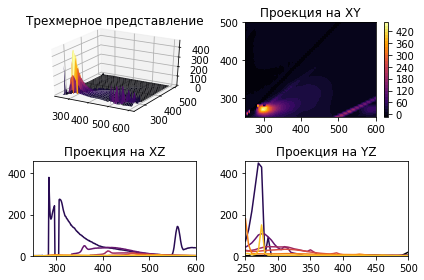

<Figure size 432x288 with 0 Axes>

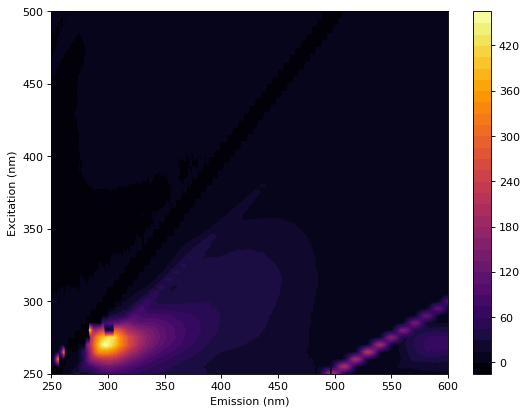

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

def parse_line(line):
    line = line.replace('\n', '').split('\t')

    data = []
    for number in line:
        if number == '':
            data.append(0)
        elif not number.isdigit() and not "," in number:
            continue
        else:
            data.append(float(number.replace(',', '.')))

    return data


def read_data(file_name):
    with open(file_name, 'r') as f:
        for _ in range(3):
            f.readline()

        y = parse_line(f.readline())
        x = []
        z = []
        for line in f:
            numbers = parse_line(line)
            x.append(numbers[0])
            if len(numbers) < 52:
                numbers.extend([0 for _ in range(77 - len(numbers))])
            zs = [numbers[i] for i in range(1, len(numbers))]
            z.append(zs)
        xx, yy = np.meshgrid(x, y)
        z = np.array(z).T
        return (xx, yy, z)


def grad_clean(Z):
    g = np.gradient(Z)
    x, y = g[0].shape
    norm = np.zeros((x, y))
    for i in range(x):
        for j in range(y):
            norm[i][j] = np.sqrt(g[0][i][j] ** 2 + g[1][i][j] ** 2)

    norm = savgol_filter(norm, 11, 0)
    for row, i in zip(norm, range(len(norm))):
        a = 5 * np.mean(row)
        for j in range(len(row)):
            if norm[i][j] >= a:
                Z[i][j] = 0
    return norm


def get_local_max(data):
    local_max = []
    x, y = data.shape
    rad = 10
    for i in range(x):
        for j in range(y):
            l = i - rad if i - rad > 0 else 0
            r = i + rad if i + rad < x else x
            u = j - rad if j - rad > 0 else 0
            d = j + rad if j + rad < y else y
            slice = data[l : r, u : d]

            if data[i][j] == np.max(slice) and data[i][j] > 200:
                local_max.append([j, i, data[i][j]])

    return np.array(local_max).T

X, Y, Z = read_data("Phe/6.7.txt")
norm = grad_clean(Z)

xs = X[0]
ys = Y.T[0]

loc = get_local_max(Z)
loc[0] = [xs[int(i)] for i in loc[0]]
loc[1] = [ys[int(i)] for i in loc[1]]


color = cm.get_cmap("inferno")
fig = plt.figure()

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap=color)
ax.set_title("Трехмерное представление")

ax = fig.add_subplot(2, 2, 2)
arg = np.argmax(Z)
c = ax.contourf(X, Y, Z, 30, cmap=color)
ax.set_title("Проекция на XY")
#ax.scatter(loc[0], loc[1])
fig.colorbar(c, ax=ax)

ax = fig.add_subplot(2, 2, 3)
ax.contour(X, Z, Y, cmap=color)
ax.set_title("Проекция на XZ")

ax = fig.add_subplot(2, 2, 4)
ax.contour(Y, Z, X, cmap=color)
ax.set_title("Проекция на YZ")

plt.tight_layout()

plt.figure()
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
c = ax.contourf(X, Y, Z, 30, cmap=color)
#points = ax.scatter(loc[0], loc[1], color='r', marker="X", label="Local maximums")
ax.set_xlabel("Emission (nm)")
ax.set_ylabel("Excitation (nm)")
fig.colorbar(c, ax=ax)
plt.show()

Градиент функции

<Figure size 432x288 with 0 Axes>

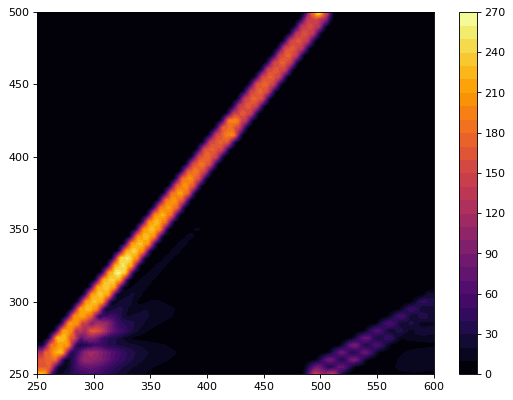

In [4]:
plt.figure()
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
c = ax.contourf(X, Y,norm, 30, cmap=color)
fig.colorbar(c, ax=ax)
plt.show()


Фильтр Савицкого-Голея

<Figure size 432x288 with 0 Axes>

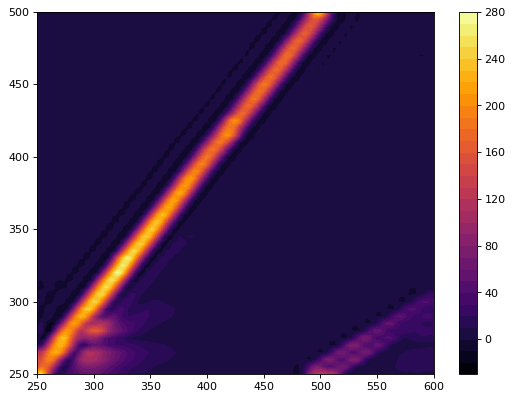

In [6]:
plt.figure()
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
Z = savgol_filter(norm,49,6)
c = ax.contourf(X, Y, Z, 30, cmap=color)
fig.colorbar(c, ax=ax)
plt.show()


Группы по отрезкам эмиссии и возбуждения пробы

<Figure size 432x288 with 0 Axes>

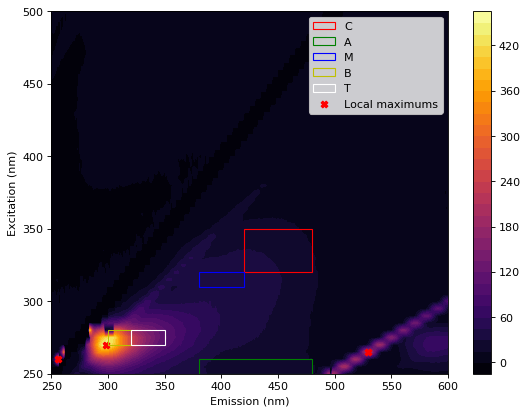

In [87]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
    
plt.figure()
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)


rect1 = patches.Rectangle((420,320),60,30,linewidth=1,edgecolor='r',facecolor='none', label = 'C')
ax.add_patch(rect1)

rect2 = patches.Rectangle((380,250),100,10,linewidth=1,edgecolor='g',facecolor='none', label = 'A')
ax.add_patch(rect2)

rect3 = patches.Rectangle((380,310),40,10,linewidth=1,edgecolor='b',facecolor='none', label = 'M')
ax.add_patch(rect3)

rect4 = patches.Rectangle((300,270),20,10,linewidth=1,edgecolor='y',facecolor='none', label = 'B')
ax.add_patch(rect4)

rect5 = patches.Rectangle((320,270),30,10,linewidth=1,edgecolor='w',facecolor='none', label = 'T')
ax.add_patch(rect5)


c = ax.contourf(X, Y, Z, 30, cmap=color)
points = ax.scatter(loc[0], loc[1], color='r', marker="X", label="Local maximums")
fig.colorbar(c, ax=ax)
ax.set_xlabel("Emission (nm)")
ax.set_ylabel("Excitation (nm)")
ax.legend()
plt.show()